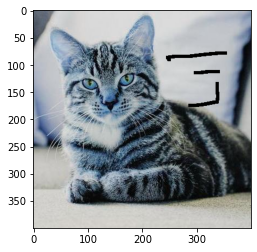

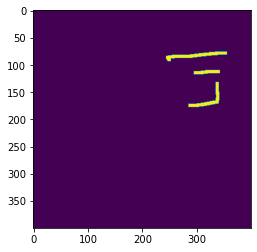

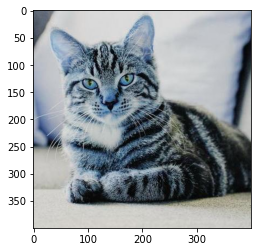

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#Open the image.
img= cv2.imread('dimage_damaged.png')
plt.imshow(img)
plt.show()
#Load the mask.
mask= cv2.imread('dimage_mask.png', 0)
plt.imshow(mask)
plt.show()
# Inpaint.
dst = cv2.inpaint (img, mask, 3, cv2.INPAINT_TELEA)
# write the output.
cv2.imwrite('dimaged_inpainted.png', dst)
plt.imshow(dst)
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (10, 8)

In [18]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off') 
    
def plot_comparison (img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

In [20]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

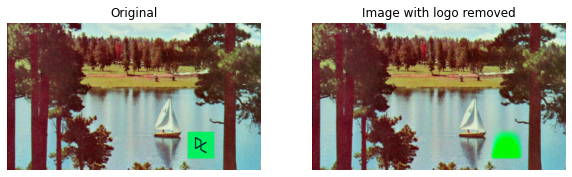

In [21]:
image_with_logo = plt.imread('imlogo.png')

#Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the Logo is to 1 
mask[210:272, 360:425] = 1

# Apply inpainting to remove the Logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                             mask,
                                             multichannel=True)

#Show the original and Logo removed images
plot_comparison (image_with_logo, image_logo_removed, 'Image with logo removed')

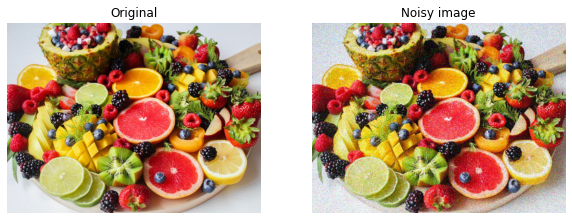

In [23]:
from skimage.util import random_noise

fruit_image= plt.imread('fruitts.jpeg')

#Add noise to the image
noisy_image = random_noise (fruit_image)

#Show th original and resulting image 
plot_comparison (fruit_image, noisy_image, 'Noisy image')

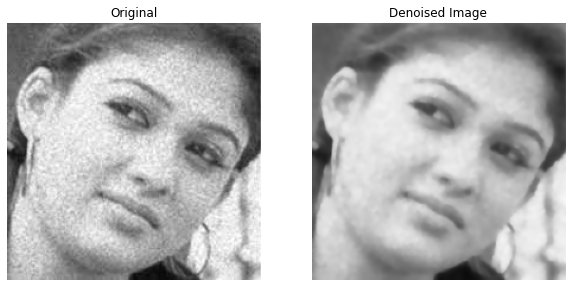

In [24]:
from skimage.restoration import denoise_tv_chambolle

noisy_image = plt.imread('noisy.jpg')

# Apply total variation filter denoising 
denoised_image = denoise_tv_chambolle (noisy_image, multichannel=True)

#Show the noisy and denoised image
plot_comparison (noisy_image, denoised_image, 'Denoised Image')

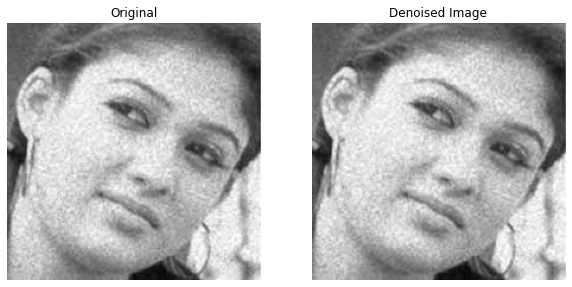

In [25]:
from skimage.restoration import denoise_bilateral
landscape_image = plt.imread('noisy.jpg')
#Apply bilateral filter denoising
denoised_image = denoise_bilateral (landscape_image, multichannel=True)
#Show original and resulting images
plot_comparison (landscape_image, denoised_image, 'Denoised Image')

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_13280/1322457267.py:7: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(face_image, n_segments=400)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_13280/1322457267.py:10: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, face_image, kind="avg")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


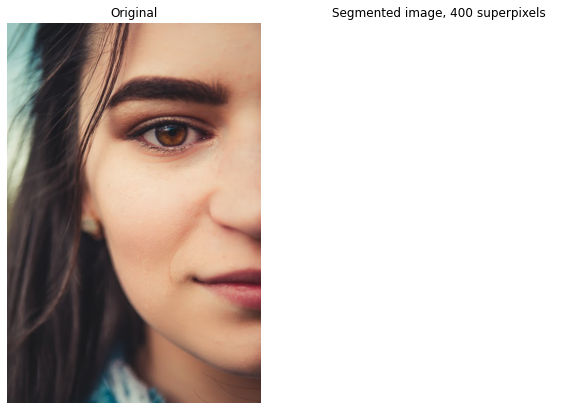

In [41]:
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image=plt.imread('face.jpg')
                      
# obtain the segmentation with 400 regions 
segments = slic(face_image, n_segments=400)
                      
# Put segments on top of original image to compare 
segmented_image = label2rgb(segments, face_image, kind="avg")
                      
#Show the segmented image
plot_comparison (face_image, segmented_image, 'Segmented image, 400 superpixels')

In [29]:
def show_image_contour (image, contours): 
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

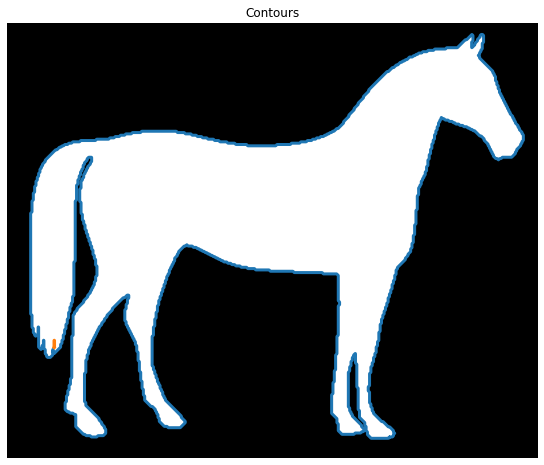

In [33]:
from skimage import measure, data

#Obtain the horse image
horse_image = data.horse()

#Find the contours with a constant Level value of 0.8 
contours = measure.find_contours (horse_image, level=0.8)

#Shows the image with contours found 
show_image_contour (horse_image, contours)

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_13280/4176379311.py:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  image_dices = color.rgb2gray(image_dices)


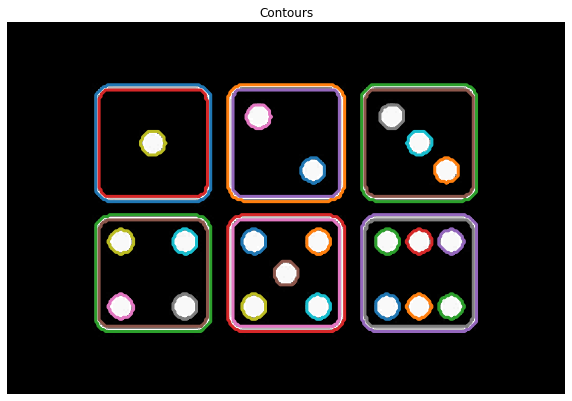

In [35]:
from skimage.io import imread 
from skimage.filters import threshold_otsu

image_dices = imread('diceimg.png')

# Make the image grayscale
image_dices = color.rgb2gray(image_dices)

#Obtain the optimal thresh value 
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary=image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours (binary, level=0.8)

# Show the image
show_image_contour (image_dices, contours)

Dices dots number: 21.


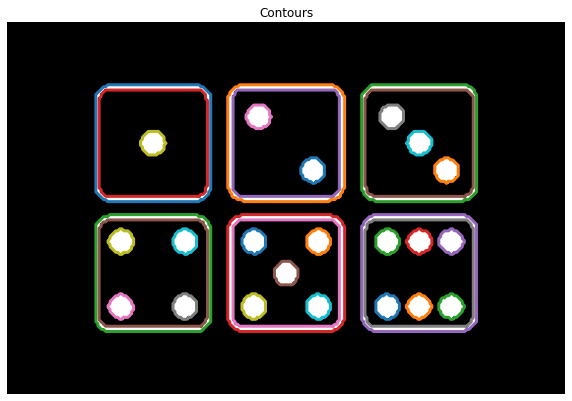

In [40]:
# Create List with the shape of each contour 
shape_contours = [cnt.shape[0] for cnt in contours]

#Set 50 as the maximum size of the dots shape 
max_dots_shape = 50

#Count dots in contours excluding bigger than dots size 
dots_contours = [cnt for cnt in contours if np.shape(cnt) [0] < max_dots_shape]

#Shows all contours found 
show_image_contour (binary, contours)

#Print the dice's number
print('Dices dots number: {}.'.format(len (dots_contours)))